# Summary
This demonstrates reconstruction of a Fresnel CDI dataset and compares the result to ePIE reconstruction. 

The probe structure allows reconstruction in CDI mode, i.e. without real-space overlap constraints. 

Scanning CDI reconstruction is also possible here, but results in a lower-quality image because of scan position jitter in this dataset.

## Object ePIE reconstruction: 
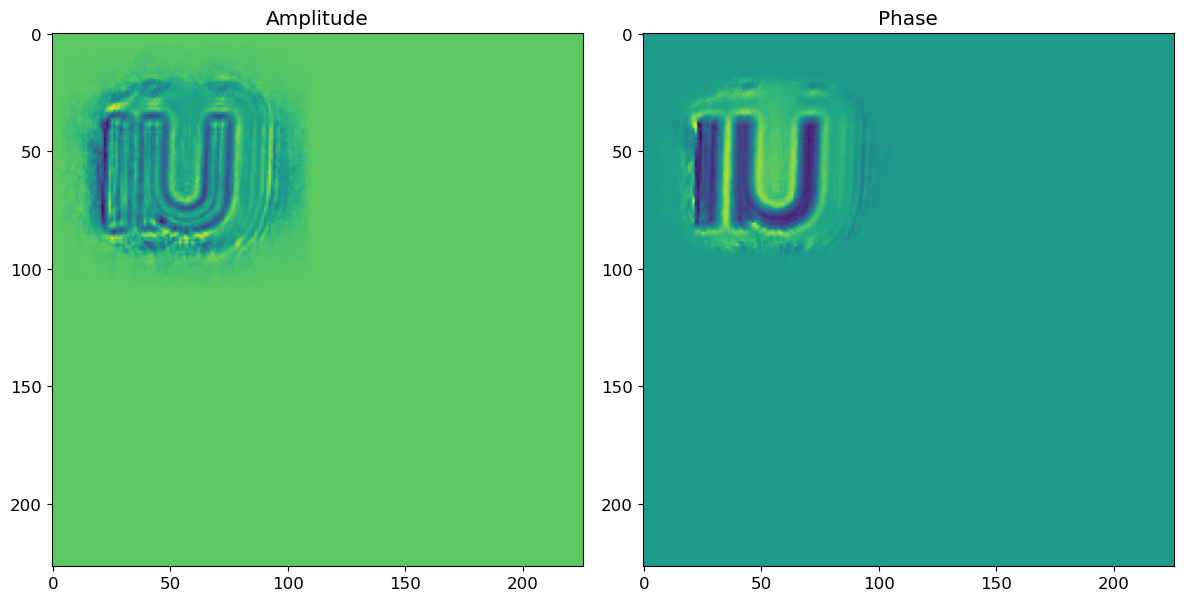

In [1]:
from ptycho.workflows.components import (
    parse_arguments,
    setup_configuration,
    load_data,
    run_cdi_example,
    save_outputs,
    logger,
    update_config_from_dict
)

1 items had no tests:
    __main__
0 tests in 1 items.
0 passed and 0 failed.
Test passed.
No GPU found, using CPU instead.


/Users/ollie/miniconda3/envs/ptycho/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
params = {
    "N": 64,
    "probe_scale": 5,
    "nphotons": 1e9,

    'nepochs': 50,
    'output_prefix': 'tmp',
    'nimgs_train': 1,
    'nimgs_test': 1,
    'intensity_scale.trainable': True,
    'positions.provided': True,
    'probe.big': True,
    'probe.mask': False,
    'data_source': 'generic',
    'gridsize': 1,
    'probe_scale': 5,
    'train_data_file': 'train_data.npz',
    'test_data_file': 'test_data.npz',

    # "amp_activation": 'swish'
}

update_config_from_dict(params)

2025-06-13 14:40:36,315 - WARNING - Configuration key 'output_prefix' is not a recognized parameter.
2025-06-13 14:40:36,315 - WARNING - Configuration key 'nimgs_train' is not a recognized parameter.
2025-06-13 14:40:36,315 - WARNING - Configuration key 'nimgs_test' is not a recognized parameter.
2025-06-13 14:40:36,316 - WARNING - Configuration key 'intensity_scale.trainable' is not a recognized parameter.
2025-06-13 14:40:36,316 - WARNING - Configuration key 'positions.provided' is not a recognized parameter.
2025-06-13 14:40:36,316 - WARNING - Configuration key 'probe.big' is not a recognized parameter.
2025-06-13 14:40:36,316 - WARNING - Configuration key 'probe.mask' is not a recognized parameter.
2025-06-13 14:40:36,316 - WARNING - Configuration key 'data_source' is not a recognized parameter.
2025-06-13 14:40:36,316 - INFO - Configuration updated programmatically for interactive session.


Current Parameters:
--------------------
N: 64
amp_activation: sigmoid
batch_size: 16
bigN: 64
big_gridsize: 10
data_source: generic
debug: True
default_probe_scale: 0.7
gaussian_smoothing_sigma: 0.0
gridsize: 1
h5_path: wts.h5
intensity_scale.trainable: True
label: 
mae_weight: 0.0
max_position_jitter: 10
model_type: pinn
n_filters_scale: 2
nepochs: 50
nimgs_test: 3
nimgs_train: 9
nll_weight: 1.0
nphotons: 1000000000.0
npseed: 42
object.big: True
offset: 4
outer_offset_test: None
outer_offset_train: None
output_prefix: training_outputs
pad_object: True
positions.provided: True
probe.big: True
probe.mask: False
probe.trainable: False
probe_scale: 5
realspace_mae_weight: 0.0
realspace_weight: 0.0
set_phi: False
sim_jitter_scale: 0.0
size: 392
test_data_file: test_data.npz
train_data_file: train_data.npz
tv_weight: 0.0


In [3]:
dpath = '../ptycho/datasets/Run1084_recon3_postPC_shrunk_3.npz'
import sys
sys.argv = [sys.argv[0], '--train_data_file', dpath,
           '--test_data_file', dpath]
args = parse_arguments()
config = setup_configuration(args, args.config)

2025-06-13 14:40:36,320 - INFO - Configuration setup complete
2025-06-13 14:40:36,320 - INFO - Final configuration: TrainingConfig(model=ModelConfig(N=64, gridsize=1, n_filters_scale=2, model_type='pinn', amp_activation='sigmoid', object_big=True, probe_big=True, probe_mask=False, pad_object=True, probe_scale=4.0, gaussian_smoothing_sigma=0.0), train_data_file=PosixPath('../ptycho/datasets/Run1084_recon3_postPC_shrunk_3.npz'), test_data_file=PosixPath('../ptycho/datasets/Run1084_recon3_postPC_shrunk_3.npz'), batch_size=16, nepochs=50, mae_weight=0.0, nll_weight=1.0, realspace_mae_weight=0.0, realspace_weight=0.0, nphotons=1000000000.0, positions_provided=True, probe_trainable=False, intensity_scale_trainable=True, output_dir=PosixPath('training_outputs'))


In [4]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p
    
    p.cfg['nepochs'] = 50
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe.mask'] = False

    p.cfg['data_source'] = 'generic'
    p.cfg['gridsize'] = 1
    p.cfg['probe_scale'] = 5
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'


# IMPORTANT: must call init() BEFORE the dataset definition
init()

In [5]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw, obj = test_generic_loader.test_generic_loader(False);

ln: ./test_generic_loader.py: File exists
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
raw diffraction shape (64, 64, 1087)
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
Train data written to train_data.npz
Test data written to test_data.n

In [6]:
from ptycho import probe
from ptycho import params as p

from ptycho.xpp import *
probe_amp = np.absolute(probeGuess)
probe.set_probe_guess(None, probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

DEBUG: Setting probe to tf.Tensor(
[[[-0.00319568+7.0538069e-03j]
  [ 0.00629659+8.3614923e-03j]
  [-0.01527882+2.2815783e-03j]
  ...
  [-0.00344439-1.1577443e-02j]
  [ 0.00536722+2.1048021e-02j]
  [-0.01550689-5.3379624e-03j]]

 [[ 0.00737527+4.2626886e-03j]
  [ 0.00338147-1.2927318e-02j]
  [-0.00259849+1.3020506e-02j]
  ...
  [-0.00370254-2.1453444e-03j]
  [ 0.00955622-5.3544580e-03j]
  [ 0.00725696-3.0339060e-03j]]

 [[ 0.00235856-8.8296877e-03j]
  [-0.01191339+4.2117182e-03j]
  [-0.00066503+1.0559234e-02j]
  ...
  [ 0.00167016+1.3494196e-02j]
  [ 0.00444973-2.4290461e-02j]
  [ 0.01283377+1.1621926e-02j]]

 ...

 [[ 0.01323293+3.0661052e-02j]
  [-0.01068897+5.6185626e-04j]
  [-0.00304481-6.9267028e-03j]
  ...
  [ 0.0142817 +2.1336402e-03j]
  [-0.01433205+5.7316925e-03j]
  [ 0.00841863-2.2449287e-02j]]

 [[-0.02066198-1.7422308e-05j]
  [ 0.00789096-2.5270011e-03j]
  [-0.01249352+1.9835820e-02j]
  ...
  [-0.01102943-1.5144664e-03j]
  [ 0.0035122 -1.1450051e-02j]
  [ 0.01920463-9.57100

In [7]:
probeGuess.shape, probeGuess.dtype

((64, 64), dtype('complex128'))

In [19]:
from ptycho import xpp
# tf.random.set_seed(45)
# np.random.seed(45)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *
from ptycho.nbutils import *

# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
ptycho_dataset.test_data.X.shape, ptycho_dataset.train_data.X.shape

(TensorShape([1087, 64, 64, 1]), TensorShape([512, 64, 64, 1]))

# Dataset description

In [9]:
print(test_raw)

RawData:
  xcoords: (1087,)
  ycoords: (1087,)
  xcoords_start: (1087,)
  ycoords_start: (1087,)
  diff3d: (1087, 64, 64)
  probeGuess: (64, 64)
  scan_index: (1087,)
  objectGuess: (227, 226)


In [10]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

In [11]:
test_data.X.shape

TensorShape([1087, 64, 64, 1])

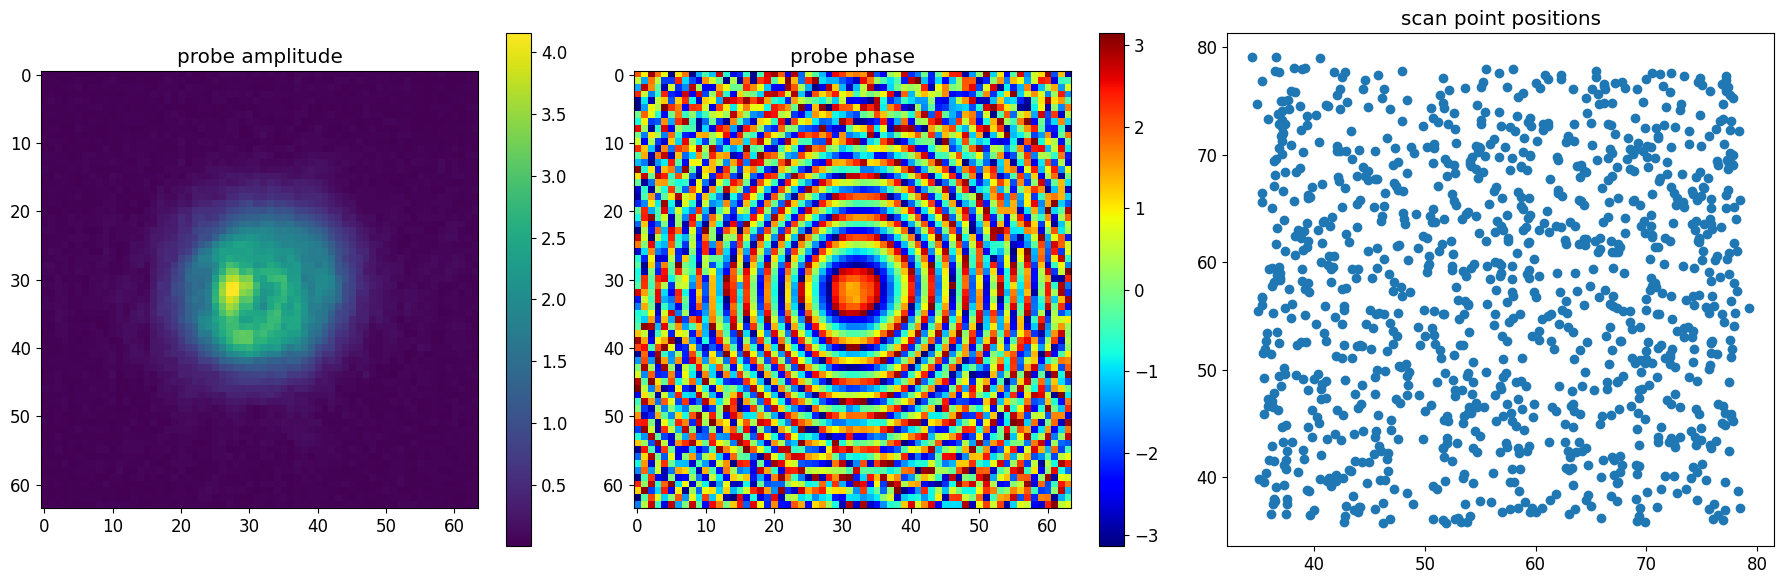

In [12]:
# Note the randomized scan point positions
probeshow(probeGuess, ptycho_dataset.test_data)

34/34 [==============================] - 6s 180ms/step
PADDING SIZE: 23
PADDING SIZE: 23


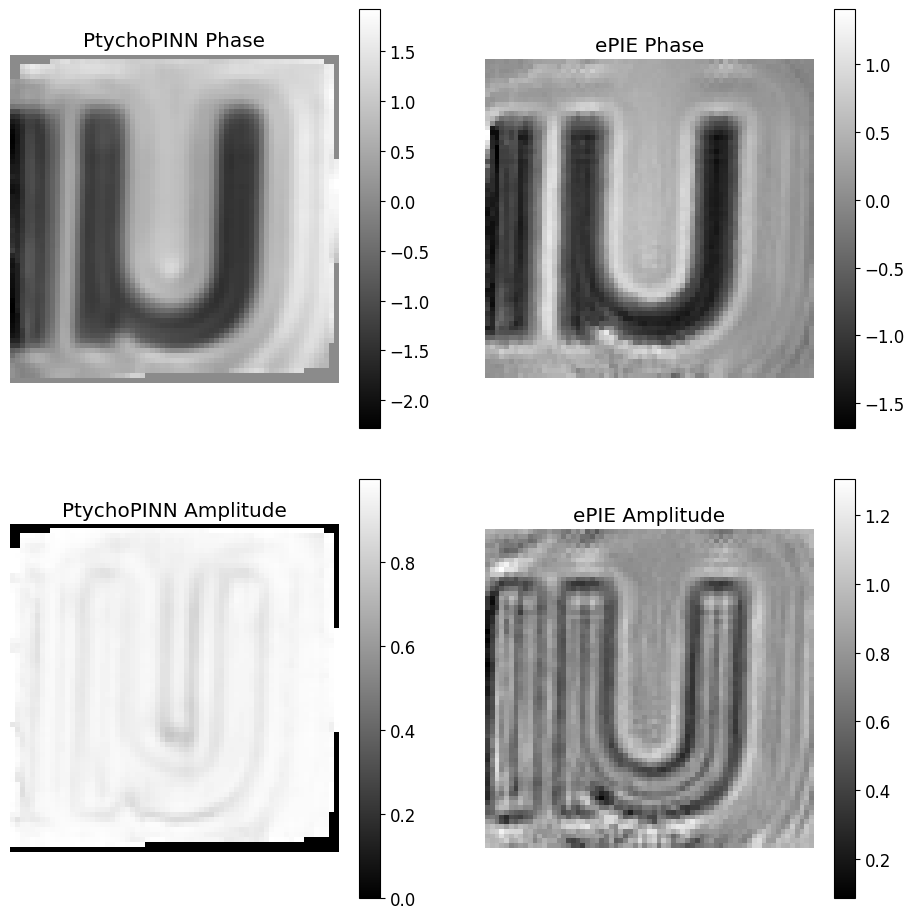

CPU times: user 37.4 s, sys: 1.5 s, total: 38.9 s
Wall time: 8.56 s


In [22]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = hh.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

## Reconstruction for a single solution region:

In [25]:
# i = 200
# from ptycho import evaluation
# evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
#                      np.absolute(p.get('probe')[:, :, 0]), 0,
#                     crop = False);